# eBOSS mocks

In [22]:
# imports
from astropy.io import fits
from astropy.table import Table

from linetools.spectra.xspectrum1d import XSpectrum1D

## Load up

In [4]:
spec_path = '/home/xavier/DESI/eBOSS/'

In [3]:
spec_file = 'spec-n1.2.fits'

In [5]:
hdul = fits.open(spec_path+spec_file)

## Explore

In [8]:
hdu0 = hdul[0]

In [12]:
data0 = hdu0.data

In [13]:
data0

In [14]:
head1 = hdul[1].header

In [15]:
head1

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   56 / width of table in bytes                        
NAXIS2  =                 1933 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    7 / number of fields in each row                   
TTYPE1  = 'continuum'          / label for field   1                            
TFORM1  = '1D      '           / data format of field: 8-byte DOUBLE            
TTYPE2  = 'error   '           / label for field   2                            
TFORM2  = '1D      '           / data format of field: 8-byte DOUBLE            
TTYPE3  = 'flux    '        

In [26]:
head1['ZQSO']

3.711

In [20]:
dat1 = Table(hdul[1].data)

In [21]:
dat1

continuum,error,flux,fluxNoNoise,pixelWidth,psf,wavelength
float64,float64,float64,float64,float64,float64,float64
2.526605368979227,0.18735999188436447,1.2065722768805516,1.3529709777609635,1.1121986313983285,0.9929189501947807,4830.21727329365
2.541309879246978,0.1949860373581412,1.469664559921833,1.7624436948656401,1.11245475408238,0.9927869201977794,4831.329599979017
2.5551526543933076,0.20433307942003934,2.3139960577304475,2.236916835383059,1.1127109357492355,0.9926548597984866,4832.44218281656
2.5688228262762416,0.2075726714053874,2.6137161945951646,2.4994019031024144,1.1129671764097737,0.9925227689846746,4833.555021865264
2.5819309821864564,0.2087324900917672,2.9202673948149473,2.5669132334120284,1.1132234760798934,0.9923906477508354,4834.668117184132
2.5948457969752456,0.2109844675916417,2.798056292214234,2.5621685829654175,1.1134798347704726,0.9922584960936935,4835.781468832179
2.606712487829119,0.2092765435708366,2.225875193209,2.514533842529778,1.11373625249741,0.9921263140032591,4836.895076868433
2.618303580506611,0.20686168436631716,2.2339428816390208,2.464803396027457,1.1139927292740939,0.991994101474015,4838.008941351935
2.6289117902893326,0.2080926022044228,2.4778682920364035,2.4959700579693602,1.1142492651130762,0.9918618584967154,4839.123062341746


In [23]:
xspec1 = XSpectrum1D.from_tuple((dat1['wavelength'],dat1['flux'],dat1['error']))

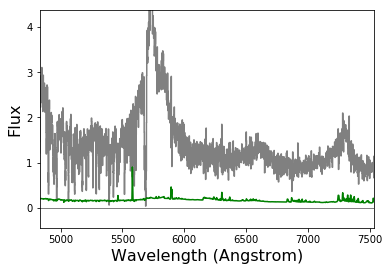

In [24]:
xspec1.plot()

### Confirm sampling

In [25]:
dv = (xspec1.wavelength[1]-xspec1.wavelength[0])/xspec1.wavelength[0] * 3e5
dv

<Quantity 69.08550625>

## Generate a catalog

In [30]:
plate, fiber, ids, ra, dec, zqso = [], [], [], [], [], []
for ii in range(1,1001):
    head = hdul[ii].header
    # Parse
    plate.append(head['PLATE'])
    fiber.append(head['FIBER'])
    ids.append(head['ID'])
    ra.append(head['RA'])
    dec.append(head['DEC'])
    zqso.append(head['ZQSO'])

In [31]:
cat = Table()
cat['PLATE'] = plate
cat['FIBER'] = fiber
cat['ID'] = ids
cat['RA'] = ra
cat['DEC'] = dec
cat['ZQSO'] = zqso
#
cat

PLATE,FIBER,ID,RA,DEC,ZQSO
int64,int64,int64,float64,float64,float64
6177,608,237177970,0.00757855,14.19739,3.711
6172,618,254324082,0.01441924,16.04823,2.895
6151,88,216253500,0.03118942,11.70189,2.831
6879,436,307802486,0.0589892,22.62055,3.49
6207,134,261262832,0.07463909,16.97546,2.7
4535,315,167205949,0.08947767,6.371028,3.539
4354,356,58771176,0.09558287,-2.454577,2.61
6498,158,379553452,0.1029121,31.32874,3.239
6513,892,328118060,0.1034599,24.95094,3.211


### Write

In [32]:
cat.write(spec_path+'catalog_1000.fits', overwrite=True)